In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  PolynomialFeatures
dataset = pd.read_csv("Beijing Air Quality0.csv",encoding='GBK')
raw_dataset=dataset.to_numpy()

AQI=raw_dataset[:,[1]]
meanAQI=sum(AQI)/len(AQI)
Train=raw_dataset[:,1:]
# Train = np.delete(Train, 6, axis=1) 
# Train = np.delete(Train, 3, axis=1) 
scaleY=MinMaxScaler()
scaleY.fit(Train)
Train=scaleY.transform(Train)
print(meanAQI)


[87.87774816788807]


In [61]:
sample=np.empty([2999,21])
for i in range(2999):
    sample[i,0:7]=Train[i,:]
    sample[i,7:14]=Train[i+1,:]
    sample[i,14:21]=Train[i+2,:]
polynomial_features = PolynomialFeatures(2,include_bias=False)
sample=polynomial_features.fit_transform(sample)
print(sample.shape)
from sklearn.model_selection import train_test_split
Train_data,test_data,train_AQI,test_AQI=train_test_split(sample,AQI[3:3002,:],test_size=0.2,random_state=0)

(2999, 252)


In [62]:
# q_range=[1,2,3,4,5]
# from sklearn.linear_model import Lasso
# mean_error=[];std_error=[]
# for q in q_range:
#         polynomial_features = PolynomialFeatures(q,include_bias=False)
#         train_data=polynomial_features.fit_transform(Train_data)
#         model = Lasso(alpha=1/(2*3))
#         temp=[]
#         from  sklearn.model_selection import KFold
#         kf=KFold(n_splits=5)
#         for train,test in kf.split(train_data):
#                 model.fit(train_data[train],train_AQI[train])
#                 score = model.score(train_data[test],train_AQI[test])

#                 AQI_pred=model.predict(train_data[test])
#                 from sklearn.metrics import mean_squared_error
#                 temp.append(mean_squared_error(train_AQI[test],AQI_pred))
#         mean_error.append(np.array(temp).mean())
#         std_error.append(np.array(temp).std())


In [63]:
# print(mean_error)
# plt.errorbar(q_range,mean_error,yerr=std_error)
# plt.title('Lasso')
# plt.xlabel('PolynomialFeatures'); plt.ylabel('Mean square error')
# plt.xlim((1,5))
# plt.show()

In [64]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_AQI,test_AQI=train_test_split(sample,AQI[3:3002,:],test_size=0.2,random_state=0)

# scaleX,scaleY=MinMaxScaler(),MinMaxScaler()
# scaleX.fit(train_data)
# scaleY.fit(test_data)
# train_data=scaleX.transform(train_data)
# test_data=scaleY.transform(test_data)
print(train_data.shape)
print(train_AQI.shape)
print(test_data.shape)
print(test_AQI.shape)

(2399, 252)
(2399, 1)
(600, 252)
(600, 1)


In [65]:
from sklearn.linear_model import Lasso
mean_error=[];std_error=[];absolute_error=[]
#c_range=[0.001,0.003,0.005,0.007,0.009,0.01,0.5]
#c_range=[0.01,0.05,0.1,0.2,0.3,0.4,0.5]
#c_range=[0.1,5,10,50,100,200]
c_range=[0.1,1,5,10,15,20,25,30,40]


In [66]:
for c in c_range:
        model = Lasso(alpha=1/(2*c))
        temp=[]
        absolute=[]
        from  sklearn.model_selection import KFold
        kf=KFold(n_splits=10)
        for train,test in kf.split(train_data):
                model.fit(train_data[train],train_AQI[train])
                score = model.score(train_data[test],train_AQI[test])
                
                AQI_pred=model.predict(train_data[test])
                from sklearn.metrics import mean_squared_error
                from sklearn.metrics import mean_absolute_error
                temp.append(mean_squared_error(train_AQI[test],AQI_pred))
                absolute.append(mean_absolute_error(train_AQI[test],AQI_pred))
        mean_error.append(np.array(temp).mean())
        absolute_error.append(np.array(absolute).mean())
        std_error.append(np.array(temp).std())


mean_error: [3793.75163673801, 2416.621007588562, 2365.6016861472554, 2386.432179360324, 2403.2990070937876, 2424.2724884608933, 2445.192816118159, 2459.1960803431666, 2472.1257178783762]
absolute_error: [44.715733407427294, 33.83514095125799, 32.76625655022842, 32.71837487406032, 32.757001688728714, 32.80629636907895, 32.85947285521242, 32.89324142840685, 32.911700256374296]


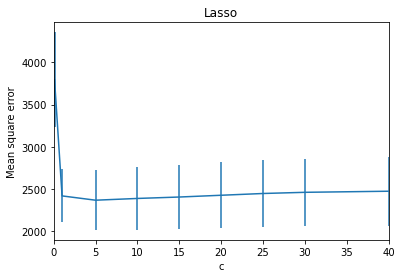

In [67]:
print('mean_error:',mean_error)
print('absolute_error:',absolute_error)
plt.errorbar(c_range,mean_error,yerr=std_error)
plt.title('Lasso')
plt.xlabel('c'); plt.ylabel('Mean square error')
plt.xlim((0,40))
plt.show()

In [68]:
model = Lasso(alpha=1/(2*5))
model.fit(train_data,train_AQI)
# print(polynomial_features.get_feature_names())
# print(model.coef_)
score = model.score(test_data,test_AQI)
score1 = model.score(train_data,train_AQI)
print('testR2score:',score)
print('trainR2score:',score1)
AQI_pred=model.predict(test_data).reshape(-1,1)
print('mean_squared_error:',mean_squared_error(test_AQI,AQI_pred))
print('mean_absolute_error:',mean_absolute_error(test_AQI,AQI_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_AQI,AQI_pred)))
#from sklearn.metrics import mean_squared_error
#temp.append(mean_squared_error(test_Min_TEMP,Min_TEMP_pred))
#mean_error.append(np.array(temp).mean())
print(AQI_pred.shape)
#print(mean_error)

testR2score: 0.456946808550439
trainR2score: 0.4375176684450317
mean_squared_error: 1980.1039281202434
mean_absolute_error: 29.59900362621822
Root Mean Squared Error: 44.4983587126564
(600, 1)


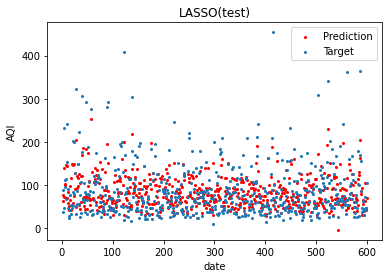

In [76]:
X=np.linspace(1,600,num=600).reshape(-1,1)
#print(Min_TEMP_pred.shape)
plt.title('LASSO(test)')
plt.scatter(X,AQI_pred,color='red',s=4)
plt.scatter(X,test_AQI,s=4)
plt.xlabel('date')
plt.ylabel('AQI')
plt.legend(['Prediction','Target'])

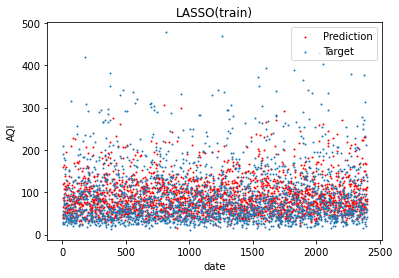

In [79]:
AQI_pred=model.predict(train_data).reshape(-1,1)
X=np.linspace(1,2399,num=2399).reshape(-1,1)
#print(Min_TEMP_pred.shape)
plt.xlabel('date')
plt.ylabel('AQI')
plt.title('LASSO(train)')
plt.scatter(X,AQI_pred,color='red',s=1)
plt.scatter(X,train_AQI,s=1)
plt.legend(['Prediction','Target'],loc='upper right')

(DummyBaseline)mean_squared_error: 3652.465160922402
(DummyBaseline)mean_absolute_error: 43.97795358649788
(DummyBaseline)Root Mean Squared Error: 60.43562824131476


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


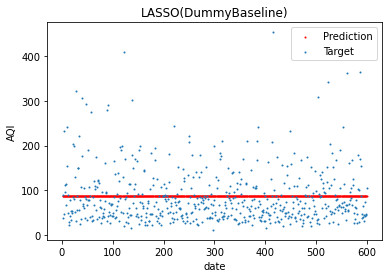

In [81]:
X=np.linspace(1,600,num=600).reshape(-1,1)
Dummy=[]
for i in range(0,600):
    Dummy.append(meanAQI)
print('(DummyBaseline)mean_squared_error:',mean_squared_error(test_AQI,Dummy))
print('(DummyBaseline)mean_absolute_error:',mean_absolute_error(test_AQI,Dummy))
print('(DummyBaseline)Root Mean Squared Error:', np.sqrt(mean_squared_error(test_AQI,Dummy)))
plt.title('LASSO(DummyBaseline)')
plt.xlabel('date')
plt.ylabel('AQI')
plt.scatter(X,Dummy,color='red',s=1)
plt.scatter(X,test_AQI,s=1)
plt.legend(['Prediction','Target'],loc='upper right')